## Importamos librerías necesarias

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import requests, json, numpy as np
import time
import sys

pd.set_option("display.max_columns", None)
sys.path.append("../")

## Primer dataset 

### Análisis univariante

In [130]:
df_torneos = pd.read_csv("../data/final/resultados_final.csv", index_col="index")
df_torneos.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score,Sets_Played,Tie_Breaks
index,,,,,,,,,,,,,,,
59060,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Moutet C.,Wu Y.,Moutet C.,62,114,6-4 5-7 6-2 4-6 7-5,5,0
59061,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Rinderknech A.,Watanuki Y.,Watanuki Y.,59,138,3-6 3-6 2-6,3,0
59062,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Van De Zandschulp B.,Ivashka I.,Van De Zandschulp B.,34,73,6-3 3-6 7-5 6-3,4,0
59063,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Barrere G.,Etcheverry T.,Etcheverry T.,83,79,6-3 3-6 4-6 4-6,4,0
59064,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Sinner J.,Edmund K.,Sinner J.,16,581,6-4 6-0 6-2,3,0


In [131]:
df_torneos['Date'] = pd.to_datetime(df_torneos['Date'])
df_torneos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1175 entries, 59060 to 61559
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tournament   1175 non-null   object        
 1   Date         1175 non-null   datetime64[ns]
 2   Series       1175 non-null   object        
 3   Court        1175 non-null   object        
 4   Surface      1175 non-null   object        
 5   Round        1175 non-null   object        
 6   Best of      1175 non-null   int64         
 7   Player_1     1175 non-null   object        
 8   Player_2     1175 non-null   object        
 9   Winner       1175 non-null   object        
 10  Rank_1       1175 non-null   int64         
 11  Rank_2       1175 non-null   int64         
 12  Score        1175 non-null   object        
 13  Sets_Played  1175 non-null   int64         
 14  Tie_Breaks   1175 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage:

Por lo que podemos observar, hay 1175 filas y 16 columnas, de las cuales la mayoría son de tipo "object" y cualitativas nominales

In [132]:
df_torneos.describe(include="int64").round(2)

,Best of,Rank_1,Rank_2,Sets_Played,Tie_Breaks
count,1175.00,1175.00,1175.00,1175.00,1175.00
mean,3.84,63.43,66.58,2.95,0.54
std,0.99,78.31,86.68,0.92,0.73
min,3.00,1.00,1.00,2.00,0.00
25%,3.00,16.00,17.00,2.00,0.00
50%,3.00,46.00,47.00,3.00,0.00
75%,5.00,84.50,84.00,3.00,1.00
max,5.00,849.00,894.00,5.00,4.00


In [133]:
for i in df_torneos.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df_torneos[i].nunique()/df_torneos.shape[0])*100:.2f}%")

La cardinalidad de la variable Tournament es 1.19%
La cardinalidad de la variable Series es 0.26%
La cardinalidad de la variable Court es 0.17%
La cardinalidad de la variable Surface es 0.26%
La cardinalidad de la variable Round es 0.68%
La cardinalidad de la variable Player_1 es 16.09%
La cardinalidad de la variable Player_2 es 15.23%
La cardinalidad de la variable Winner es 13.36%
La cardinalidad de la variable Score es 61.62%


La cardinalidad de las variables es muy baja

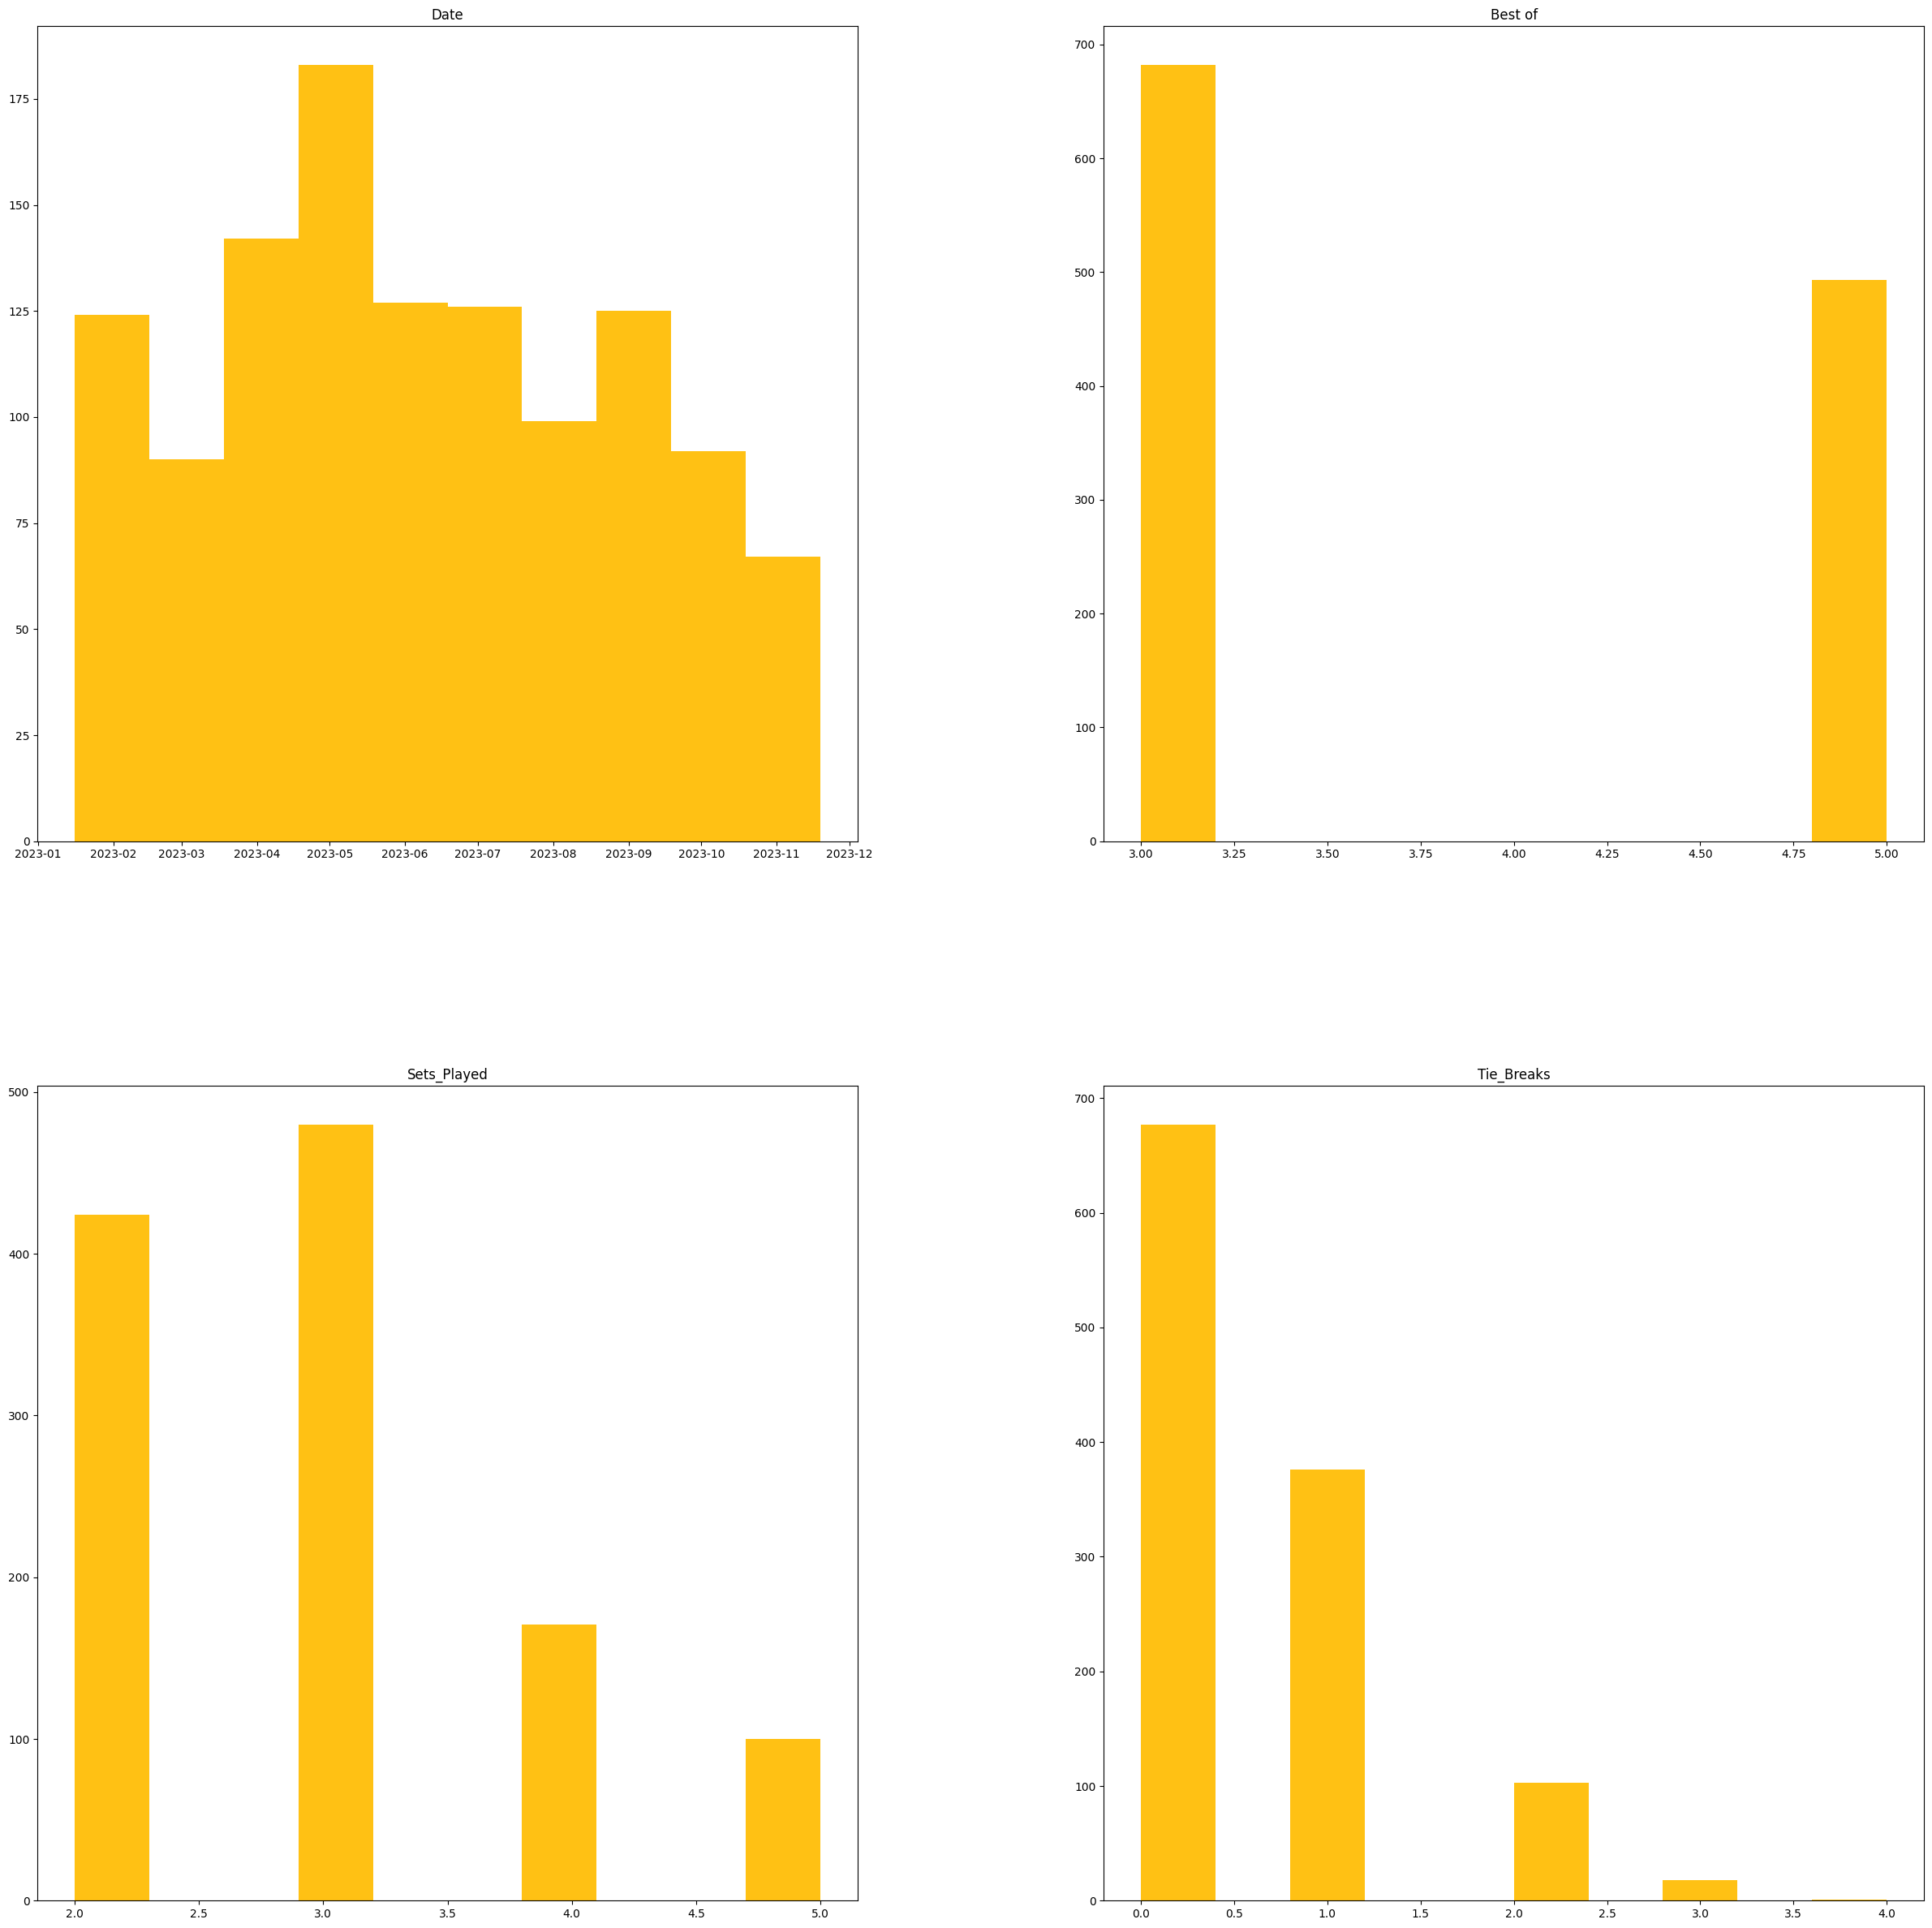

In [134]:
color = "#FFC114"
df_torneos[["Date", "Best of", "Sets_Played", "Tie_Breaks"]].hist(figsize=(30, 30),grid=False,color=color);

Del histograma superior, podemos sacar 4 conclusiones:
1. La mayoría de los torneos se ceelebran en primavera-verano
2. Los partidos se juegan al mejor de 3 sets o al mejor de 5 sets
3. Los partidos generalmente duran 2 o 3 sets, rara vez 5 sets
4. Es poco probable que haya tie-breaks

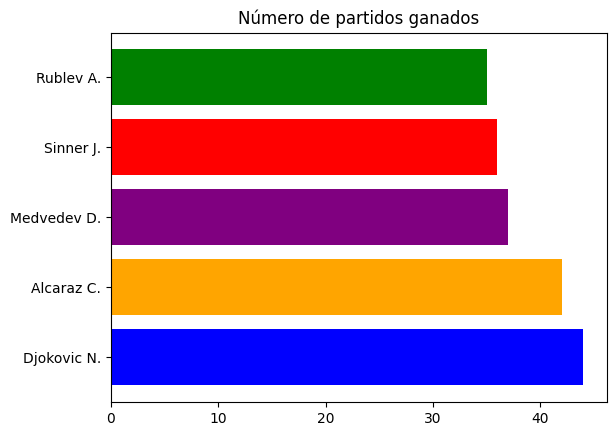

In [135]:
#Número de partidos ganados en total
winners = df_torneos.groupby("Winner").count().sort_values("Series", ascending=False).head(5).index
victorias = df_torneos.groupby("Winner").count().sort_values("Series", ascending=False).head(5)["Series"]

color = ['blue', 'orange', 'purple', 'red', 'green']

plt.barh(winners, victorias, color=color)
plt.title("Número de partidos ganados")
plt.show()

Quienes han ganado más partidos han sido Novak Djokovic y Carlos Alcaraz

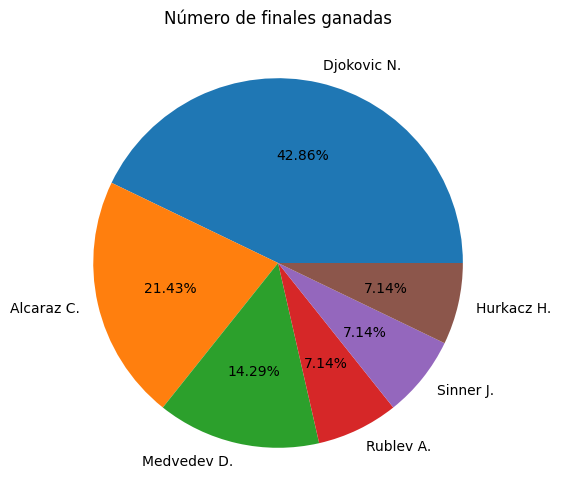

In [136]:
df_Finales = df_torneos[df_torneos["Round"] == "The Final"]
ganaFinal = df_Finales["Winner"].value_counts()
plt.figure(figsize = (6,6))
plt.title("Número de finales ganadas")
plt.pie(ganaFinal.values,
       labels = ganaFinal.index,
       autopct='%1.2f%%');


Quienes han finales han ganado han sido Novak Djokovic y Carlos Alcaraz

### Análisis multivariante

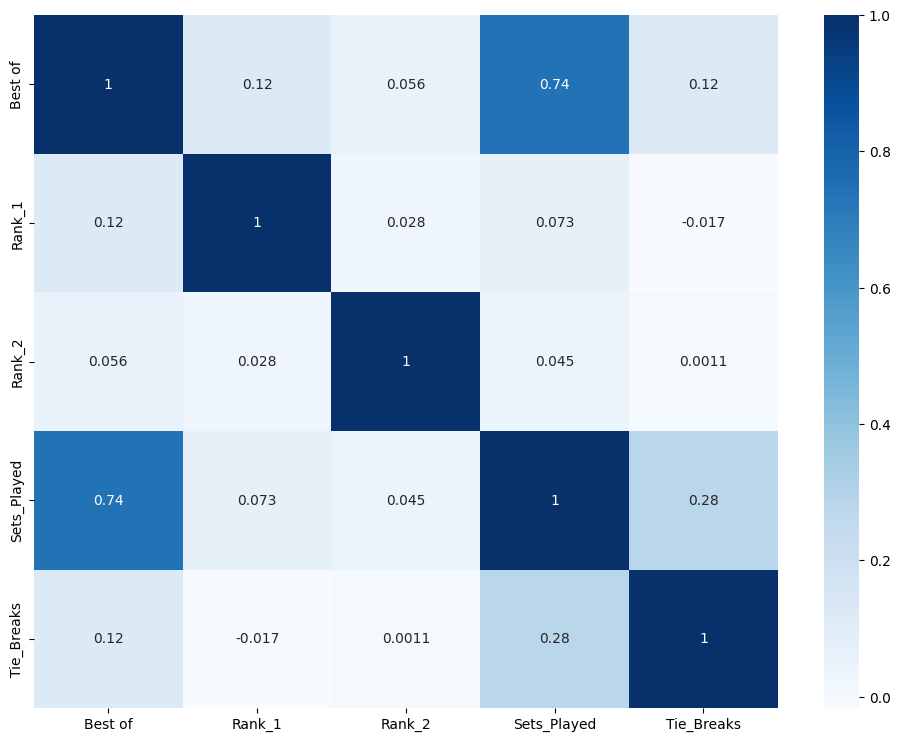

In [137]:
plt.figure(figsize=(12,9))
sns.heatmap(df_torneos.corr(numeric_only=True), annot=True, cmap = "Blues");

Podemos ver que la mayor correlación se ve entre el número de sets jugados ("Sets_Played") y el número de sets al que se juega ("Best of").

## Segundo dataset

In [138]:
dfStats = pd.read_csv("../data/final/estadisticas_final.csv")
dfStats.drop("Unnamed: 0", axis=1, inplace=True)
dfStats.head()

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,0.41,741,0.88,0.55,0.70,110.0,329.0,209.0,652.0
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,0.42,881,0.85,0.54,0.67,148.0,449.0,280.0,749.0
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,0.41,923,0.85,0.54,0.66,193.0,417.0,286.0,785.0
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,0.41,901,0.87,0.54,0.68,155.0,424.0,259.0,784.0
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,1029,0.24,0.38,1038,0.84,0.52,0.66,171.0,403.0,247.0,872.0


### Análisis univariante

In [139]:
dfStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  50 non-null     object 
 1   First serve                  50 non-null     float64
 2   First Serve Points Won       50 non-null     float64
 3   1st Serve Return Points Won  50 non-null     object 
 4   2nd Serve Points Won         50 non-null     float64
 5   2nd Serve Return Points Won  50 non-null     object 
 6   Aces                         50 non-null     int64  
 7   Break Points Converted       50 non-null     float64
 8   Break Points Faced           50 non-null     int64  
 9   Break Points Opportunities   50 non-null     int64  
 10  Break Points Saved           50 non-null     float64
 11  Double Faults                50 non-null     int64  
 12  Return Games Played          50 non-null     int64  
 13  Return Games Won %    

Podemos ver que hay 50 filas y 24 columnas en total, la mayoría de las cuales son de tipo numérico continuo

In [140]:
for i in dfStats.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(dfStats[i].nunique()/dfStats.shape[0])*100:.2f}%")

La cardinalidad de la variable Player Name es 100.00%
La cardinalidad de la variable 1st Serve Return Points Won es 24.00%
La cardinalidad de la variable 2nd Serve Return Points Won es 22.00%


In [141]:
for i in dfStats.select_dtypes(include=["int64", "float64"]):
    print(f"La cardinalidad de la variable {i} es {(dfStats[i].nunique()/dfStats.shape[0])*100:.2f}%")

La cardinalidad de la variable First serve es 28.00%
La cardinalidad de la variable First Serve Points Won es 28.00%
La cardinalidad de la variable 2nd Serve Points Won es 24.00%
La cardinalidad de la variable Aces es 92.00%
La cardinalidad de la variable Break Points Converted es 28.00%
La cardinalidad de la variable Break Points Faced es 88.00%
La cardinalidad de la variable Break Points Opportunities es 96.00%
La cardinalidad de la variable Break Points Saved es 26.00%
La cardinalidad de la variable Double Faults es 92.00%
La cardinalidad de la variable Return Games Played es 94.00%
La cardinalidad de la variable Return Games Won % es 34.00%
La cardinalidad de la variable Return Points Won es 24.00%
La cardinalidad de la variable Service Games Played es 98.00%
La cardinalidad de la variable Service Games Won % es 34.00%
La cardinalidad de la variable Total Points Won es 16.00%
La cardinalidad de la variable Total Service Points Won es 20.00%
La cardinalidad de la variable BreakPoint

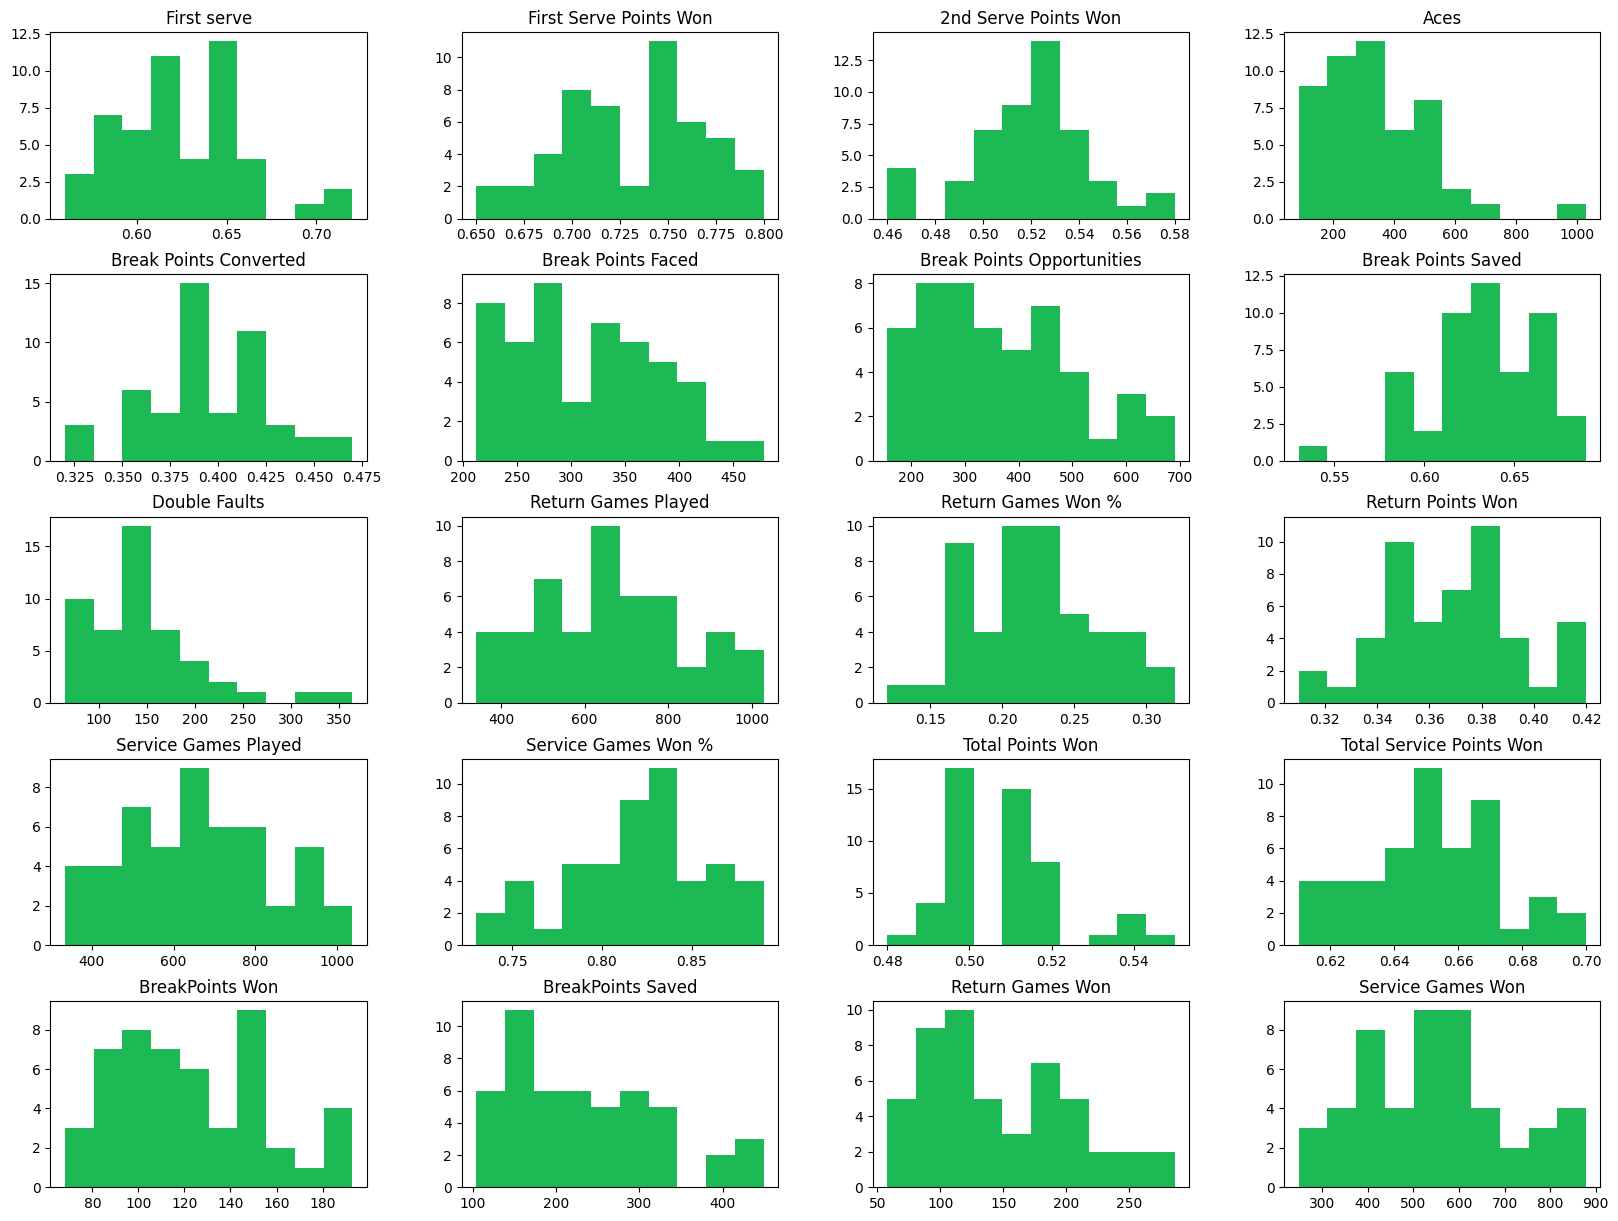

In [142]:
dfStats.hist(figsize=(20,15),grid=False,color="#1DB954");

De este histograma podemos sacar información como que:
- Los jugadores del top-50 meten el 65% de los primeros servicios
- Los jugadores del top-50 ganan el 75% de los primeros servicios
- Los jugadores del top-50 ganan el 83% de los juegos en los que están al servicio


In [143]:
dfStats.describe().round(2)


,First serve,First Serve Points Won,2nd Serve Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
count,50.00,50.00,50.00,50.00,50.00,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,0.62,0.73,0.52,350.52,0.39,314.0,369.44,0.63,145.14,658.56,0.22,0.37,661.28,0.82,0.51,0.65,123.76,234.30,146.00,545.32
std,0.03,0.04,0.03,174.71,0.03,67.9,135.57,0.03,59.85,173.65,0.04,0.02,176.30,0.04,0.01,0.02,31.84,89.64,58.12,161.64
min,0.56,0.65,0.46,85.00,0.32,212.0,155.00,0.53,65.00,340.00,0.12,0.31,334.00,0.73,0.48,0.61,68.00,104.00,58.00,248.00
25%,0.60,0.71,0.50,230.25,0.37,262.0,256.00,0.61,103.50,530.00,0.19,0.35,525.25,0.80,0.50,0.64,101.25,161.25,98.25,414.75
50%,0.62,0.74,0.52,338.00,0.39,313.5,350.00,0.64,133.50,668.50,0.22,0.37,666.00,0.82,0.51,0.65,119.50,212.00,136.50,534.50
75%,0.64,0.76,0.54,460.50,0.41,365.5,458.50,0.66,164.00,772.75,0.24,0.38,769.25,0.85,0.52,0.67,147.50,293.25,181.50,642.25
max,0.72,0.80,0.58,1031.00,0.47,478.0,691.00,0.69,364.00,1029.00,0.32,0.42,1038.00,0.89,0.55,0.70,193.00,449.00,286.00,879.00


### Análisis bivariante

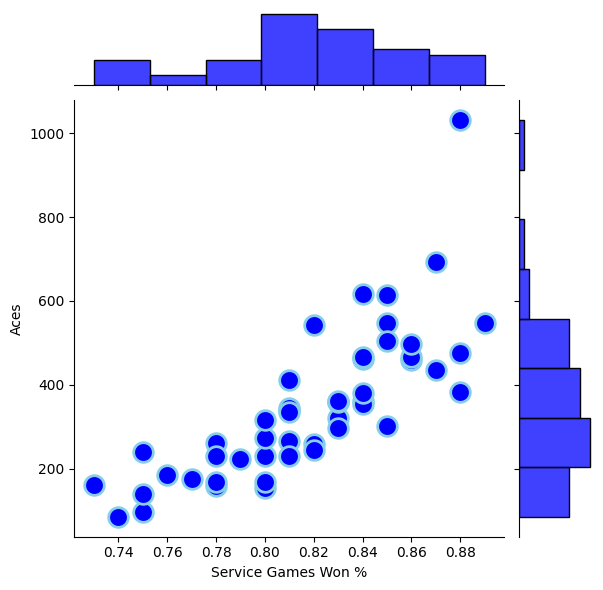

In [144]:
sns.jointplot(x=dfStats["Service Games Won %"], y=dfStats["Aces"], kind='scatter',
              color='blue', edgecolor="skyblue", linewidth=2, s=200)

plt.show();

Podemos sacar de este gráfico que el número de aces está relacionado con un buen porcentaje de Juegos ganados al servicio

### Análisis multivariante

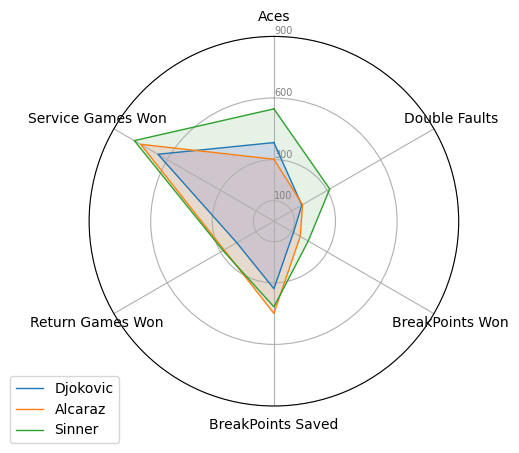

In [145]:
from math import pi

dfStats_values = dfStats.head()[["Player Name","Aces", "Double Faults","BreakPoints Won", "BreakPoints Saved", "Return Games Won", "Service Games Won"]]

# number of variable
categories=list(dfStats_values)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, projection="polar")
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100,300,600, 900], ["100","300","600", "900"], color="grey", size=7)
plt.ylim(0,900)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dfStats_values.loc[0].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Djokovic")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dfStats_values.loc[1].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Alcaraz")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=dfStats_values.loc[2].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Sinner")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

Con el gráfico superior podemos ver las estadísticas del top 3 superpuestas, con lo que se puede ver, por ejemplo, que Sinner tiene mejores estadísticas en global que Djokovic y Alcaraz.

En la gráfica de abajo se puede ver lo mismo, pero separadas

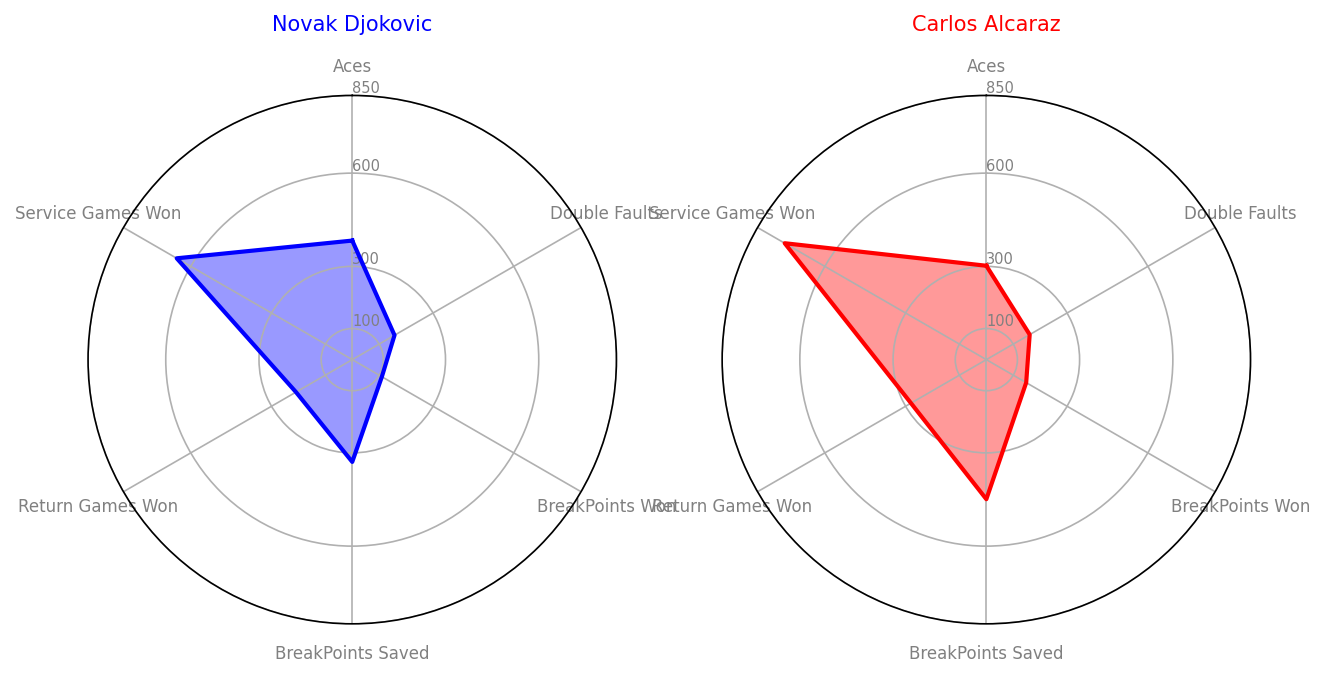

In [146]:
def make_spider( row, title, color):

    # number of variable
    categories=list(dfStats_values)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,2,row +1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([100,300,600, 850], ["100","300","600", "850"], color="grey", size=7)
    plt.ylim(0,850)

    # Ind1
    values=dfStats_values.loc[row].drop('Player Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=10, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=150
plt.figure(figsize=(1500/my_dpi, 2500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
colores = ["b", "r", "r"]

# Loop to plot
for row in range(0, len(dfStats_values.head(2).index)):
    col = colores[row]
    make_spider( row=row, title=dfStats_values['Player Name'][row],color=col)

In [147]:
for i in dfStats.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(dfStats[i].nunique()/dfStats.shape[0])*100:.2f}%")

La cardinalidad de la variable Player Name es 100.00%
La cardinalidad de la variable 1st Serve Return Points Won es 24.00%
La cardinalidad de la variable 2nd Serve Return Points Won es 22.00%


In [148]:
for i in dfStats.select_dtypes(include=["int64", "float64"]):
    print(f"La cardinalidad de la variable {i} es {(dfStats[i].nunique()/dfStats.shape[0])*100:.2f}%")

La cardinalidad de la variable First serve es 28.00%
La cardinalidad de la variable First Serve Points Won es 28.00%
La cardinalidad de la variable 2nd Serve Points Won es 24.00%
La cardinalidad de la variable Aces es 92.00%
La cardinalidad de la variable Break Points Converted es 28.00%
La cardinalidad de la variable Break Points Faced es 88.00%
La cardinalidad de la variable Break Points Opportunities es 96.00%
La cardinalidad de la variable Break Points Saved es 26.00%
La cardinalidad de la variable Double Faults es 92.00%
La cardinalidad de la variable Return Games Played es 94.00%
La cardinalidad de la variable Return Games Won % es 34.00%
La cardinalidad de la variable Return Points Won es 24.00%
La cardinalidad de la variable Service Games Played es 98.00%
La cardinalidad de la variable Service Games Won % es 34.00%
La cardinalidad de la variable Total Points Won es 16.00%
La cardinalidad de la variable Total Service Points Won es 20.00%
La cardinalidad de la variable BreakPoint

<hr>
<div>
    <a href="./2_Preparacion_Datos.ipynb">
        <button style="float: left;">&#8592; 2. Preparación de datos</button>
    </a>
    <a href="./4_Hipotesis.ipynb">
        <button style="float: right;">4. Hipótesis &#8594;</button>
    </a>
</div>
<hr>